In [25]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [26]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [27]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools


In [28]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [29]:
def load_img(path_to_img):
    max_dim = 256
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    #img = tf.image.resize(img, new_shape)
    img = tf.image.resize(img, (256, 256))
    img = img[tf.newaxis, :]
    return img

In [30]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)


In [31]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [32]:
photo_images = os.listdir("/kaggle/input/gan-getting-started/photo_jpg/")
monet_images = os.listdir("/kaggle/input/gan-getting-started/monet_jpg/")

In [33]:
! mkdir ../images

mkdir: cannot create directory ‘../images’: File exists


In [34]:
import random
iss = [60, 81, 53, 59, 5, 88, 36, 28, 71, 2, 10, 81, 88, 25, 3, 26]
j = 0
list_of_i = []
for photo in photo_images:
    monet_path = "/kaggle/input/gan-getting-started/monet_jpg/" + monet_images[ iss[random.randint(0,len(iss)-1)] ]
    photo_path = "/kaggle/input/gan-getting-started/photo_jpg/" + photo

    content_image = load_img(photo_path)
    style_image = load_img(monet_path)
    
    with tf.device("/GPU:0"):
        stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
        out = tensor_to_image(stylized_image)
    
#     plt.subplot(1,3,1)
#     plt.imshow(content_image[0])
#     plt.subplot(1,3,2)
#     plt.title(i)
#     plt.imshow(style_image[0])
#     plt.subplot(1,3,3)
#     plt.imshow(stylized_image[0])
#     plt.show()

    out.save(f'/kaggle/images/{str(j)}.jpg')
    j += 1
    print(j , "/" ,len(photo_images))

5973 / 7038
5974 / 7038
5975 / 7038
5976 / 7038
5977 / 7038
5978 / 7038
5979 / 7038
5980 / 7038
5981 / 7038
5982 / 7038
5983 / 7038
5984 / 7038
5985 / 7038
5986 / 7038
5987 / 7038
5988 / 7038
5989 / 7038
5990 / 7038
5991 / 7038
5992 / 7038
5993 / 7038
5994 / 7038
5995 / 7038
5996 / 7038
5997 / 7038
5998 / 7038
5999 / 7038
6000 / 7038
6001 / 7038
6002 / 7038
6003 / 7038
6004 / 7038
6005 / 7038
6006 / 7038
6007 / 7038
6008 / 7038
6009 / 7038
6010 / 7038
6011 / 7038
6012 / 7038
6013 / 7038
6014 / 7038
6015 / 7038
6016 / 7038
6017 / 7038
6018 / 7038
6019 / 7038
6020 / 7038
6021 / 7038
6022 / 7038
6023 / 7038
6024 / 7038
6025 / 7038
6026 / 7038
6027 / 7038
6028 / 7038
6029 / 7038
6030 / 7038
6031 / 7038
6032 / 7038
6033 / 7038
6034 / 7038
6035 / 7038
6036 / 7038
6037 / 7038
6038 / 7038
6039 / 7038
6040 / 7038
6041 / 7038
6042 / 7038
6043 / 7038
6044 / 7038
6045 / 7038
6046 / 7038
6047 / 7038
6048 / 7038
6049 / 7038
6050 / 7038
6051 / 7038
6052 / 7038
6053 / 7038
6054 / 7038
6055 / 7038
6056

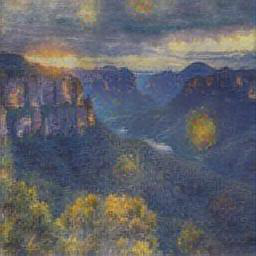

In [40]:
PIL.Image.open("/kaggle/images/2030.jpg")

In [41]:
import shutil
shutil.make_archive("/kaggle/working/images", 'zip', "/kaggle/images")

'/kaggle/working/images.zip'